## Big Data: Audio

Focusing on **audio data** for scalable visualization in a distributed environment is a great choice. Audio data introduces unique challenges, including high frequency and volume, which necessitate efficient handling, processing, and visualization techniques. Here’s a structured approach for tackling audio data visualization in a big data context:

### 1. **Understanding Audio Data Characteristics**

   - **Volume**: Audio data can grow quickly, especially in environments where continuous recording or streaming is involved (e.g., call centers, voice assistants, or sensor networks).
   - **Velocity**: Real-time audio data streams can demand rapid processing and visualization for applications like live monitoring, transcription, or anomaly detection.
   - **Complexity**: Audio data requires transformations, such as converting sound waves to frequency spectra or detecting patterns like speech or silence.

### 2. **Objectives for Audio Data Visualization**

   - **Real-Time Monitoring**: Visualize audio data streams for applications like network monitoring, call center analysis, or public events.
   - **Frequency and Spectral Analysis**: Use spectrograms, waveforms, and other audio-specific visualization techniques to analyze sound patterns and frequencies over time.
   - **Anomaly Detection and Pattern Recognition**: Visualize anomalies, such as loudness peaks, silence, or unusual sounds, to detect patterns that could be linked to events or specific conditions.

### 3. **Data Preprocessing and Distributed Audio Processing**

   - **Audio Data Transformation**:
     - Convert raw audio (e.g., .wav, .mp3) into analyzable formats such as waveforms or frequency spectrums.
     - Use techniques like **Short-Time Fourier Transform (STFT)** or **Mel-Frequency Cepstral Coefficients (MFCC)** to break down audio into segments for better analysis and visualization.
   - **Distributed Processing for Audio Data**:
     - Leverage distributed frameworks like **Apache Spark** (with PySpark for audio processing) or **Dask** to parallelize data transformations, especially for batch processing.
     - Consider **Apache Kafka** or **Flink** for real-time streaming to handle live audio data.

### 4. **Audio Data Visualization Techniques**

   - **Waveform Visualization**: Display amplitude over time to see the volume or intensity variations in the audio. This is useful for basic sound analysis, speech recognition, and identifying periods of silence or loudness.
   - **Spectrograms**: Represent audio data in time-frequency space, showing how frequencies change over time. Spectrograms are beneficial for detecting patterns, identifying specific sounds, or even music genre classification.
   - **Mel-Spectrograms**: Convert frequencies to a logarithmic scale, reflecting how humans perceive sound frequencies, which can be useful for speech and music analysis.
   - **3D Audio Feature Plots**: Use 3D visualizations to represent more complex features (e.g., MFCCs), with axes for time, frequency, and amplitude or coefficients.
   - **Event Detection**: Visualize detected events or anomalies (e.g., specific sounds or peaks) by overlaying markers on waveforms or spectrograms for easy tracking.

### 5. **Tools and Frameworks for Distributed Audio Visualization**

   - **Librosa**: For audio processing in Python, especially to compute waveforms, spectrograms, and MFCCs.
   - **Matplotlib** and **Seaborn**: For basic waveform and spectrogram visualizations in Python, especially useful for prototyping.
   - **Plotly** (with Dash) or **Bokeh**: To create interactive and scalable audio visualizations. These tools can handle real-time updates and integrate well with backend data streams.
   - **Datashader**: For rendering large-scale, dense audio data visualizations. It’s particularly effective if your project will involve visualizing large spectrograms over extended periods.

### 6. **Execution Plan for Scalable Audio Visualization**

   #### **Phase 1: Data Collection and Storage**
   - Collect sample audio data relevant to your domain. Datasets like **Google Speech Commands**, **UrbanSound8K**, or **LibriSpeech** could be good starting points.
   - Store audio files in distributed storage (e.g., HDFS, AWS S3) for high availability and scalability.

   #### **Phase 2: Distributed Audio Processing Pipeline**
   - Develop an ETL pipeline in Spark or Dask to preprocess audio data, extract features (e.g., spectrograms, MFCCs), and store them for visualization.
   - If real-time visualization is a goal, implement Kafka or Flink to handle streaming audio and real-time feature extraction.

   #### **Phase 3: Visualization Development**
   - **Prototype Visualizations**: Start by visualizing waveforms and spectrograms for small audio samples.
   - **Scale Up**: Once prototypes are set, scale up to larger datasets and implement distributed rendering.
   - **Optimize for Performance**: Use LOD controls in spectrogram visualizations and caching mechanisms for frequently accessed data.

   #### **Phase 4: Deploy and Evaluate**
   - Test the visualization pipeline in a distributed environment to ensure it handles high volumes and real-time requirements.
   - Measure the performance in terms of latency, load time, and interactivity.

### 7. **Challenges and Optimization Techniques**

   - **Handling High-Frequency Data**: Audio data can generate a high volume of data points over time, especially with high sample rates. Techniques like **sampling** and **downsampling** can help reduce data volume.
   - **Latency in Real-Time Visualization**: When dealing with streaming audio, ensure low latency by using efficient streaming platforms (e.g., Kafka) and lightweight visualization tools.
   - **Storage and Retrieval of Processed Audio Features**: Pre-compute and cache features, especially for frequently accessed data. For instance, storing spectrogram images instead of recalculating them can reduce computation.

### 8. **Potential Deliverables**

   - **Interactive Audio Visualizations**: Demonstrate various audio visualization techniques (waveform, spectrogram, etc.) with distributed processing.
   - **Benchmark Report**: Compare processing times and visualization performance across different distributed systems (e.g., Spark vs. Dask).
   - **Documentation**: Detailed documentation on setup, configuration, and how each visualization technique was implemented.
   - **Case Study**: Apply the pipeline to a specific scenario, like detecting abnormal sounds or analyzing audio patterns in a specific dataset.

This structured approach allows you to focus on the nuances of audio data in big data visualization while leveraging distributed systems for scalability and performance. Let me know if you’d like to explore any of these steps further or if there’s a specific area where you need more detailed guidance.

In [1]:
# Installing requirements
!pip install requests beautifulsoup4 pydub

In [ ]:
# Scrapping audio file
import requests
from bs4 import BeautifulSoup
from pydub import AudioSegment
import os

# Set up headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}

# Sample freesound URL
url = 'https://freesound.org/apiv2/sounds/search/?query=rain&fields=id,name,previews&token=YOUR_API_KEY'

# Create a directory to store audio files
if not os.path.exists("audio_files"):
    os.makedirs("audio_files")

# Function to download audio from a given URL
def download_audio(audio_url, file_name):
    try:
        response = requests.get(audio_url, headers=headers)
        with open(f"audio_files/{file_name}.mp3", "wb") as f:
            f.write(response.content)
        print(f"Downloaded: {file_name}")
    except Exception as e:
        print(f"Failed to download {file_name}: {e}")

# Fetch audio links
def scrape_audio_data():
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        for audio in data['results']:
            audio_name = audio['name']
            preview_url = audio['previews']['preview-lq-mp3']  # low quality preview mp3
            download_audio(preview_url, audio_name)
    else:
        print("Failed to fetch data from Freesound API")

# Run the scraper
scrape_audio_data()


In [ ]:
def convert_to_wav(mp3_file_path):
    sound = AudioSegment.from_mp3(mp3_file_path)
    wav_file_path = mp3_file_path.replace('.mp3', '.wav')
    sound.export(wav_file_path, format="wav")
    print(f"Converted {mp3_file_path} to {wav_file_path}")

Loaded /content/mixkit-stadium-chaotic-loud-applause-drums-and-chants-363.wav with sample rate 44100


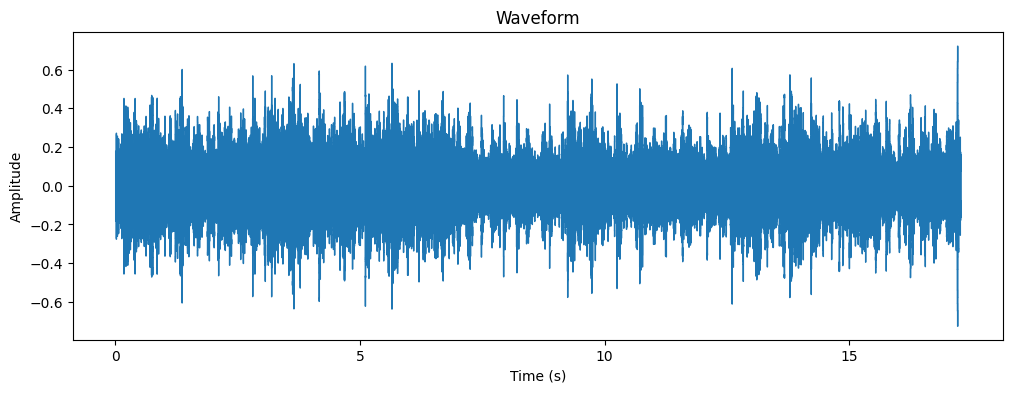

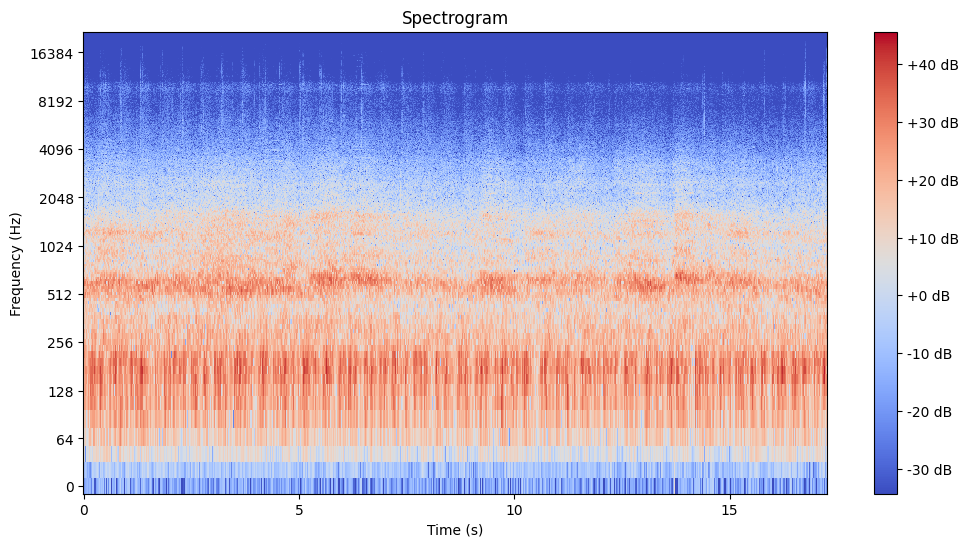

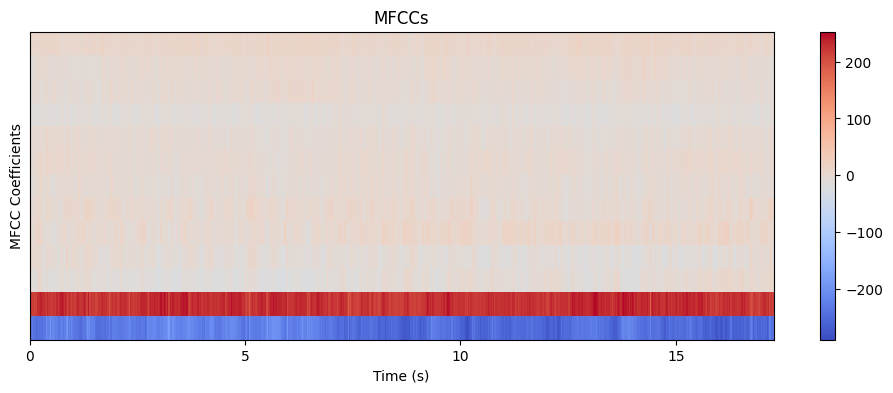

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the .wav file
def load_audio(file_path):
    # Librosa loads audio at a sample rate of 22050 Hz by default
    audio_data, sample_rate = librosa.load(file_path, sr=None)  # sr=None to keep original sample rate
    print(f"Loaded {file_path} with sample rate {sample_rate}")
    return audio_data, sample_rate

# Display waveform
def display_waveform(audio_data, sample_rate):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Display spectrogram
def display_spectrogram(audio_data, sample_rate):
    # Generate a spectrogram
    stft = librosa.stft(audio_data)
    spectrogram = librosa.amplitude_to_db(np.abs(stft))

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Extract MFCCs and display them
def display_mfccs(audio_data, sample_rate):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis="time")
    plt.colorbar()
    plt.title("MFCCs")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.show()

# Specify the path to your .wav file
file_path = "/content/mixkit-stadium-chaotic-loud-applause-drums-and-chants-363.wav"

# Load the audio file
audio_data, sample_rate = load_audio(file_path)

# Display different visualizations
display_waveform(audio_data, sample_rate)
display_spectrogram(audio_data, sample_rate)
display_mfccs(audio_data, sample_rate)


In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from concurrent.futures import ProcessPoolExecutor, as_completed

# Load the .wav file
def load_audio(file_path):
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    print(f"Loaded {file_path} with sample rate {sample_rate}")
    return audio_data, sample_rate

# Display waveform
def display_waveform(audio_data, sample_rate, file_name):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.title(f"Waveform - {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.savefig(f"waveforms/{file_name}_waveform.png")  # Save the figure
    plt.close()  # Close the figure to free memory

# Display spectrogram
def display_spectrogram(audio_data, sample_rate, file_name):
    stft = librosa.stft(audio_data)
    spectrogram = librosa.amplitude_to_db(np.abs(stft))

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram - {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.savefig(f"spectrograms/{file_name}_spectrogram.png")
    plt.close()

# Extract and display MFCCs
def display_mfccs(audio_data, sample_rate, file_name):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis="time")
    plt.colorbar()
    plt.title(f"MFCCs - {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.savefig(f"mfccs/{file_name}_mfccs.png")
    plt.close()

# Process a single audio file
def process_audio(file_path):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    audio_data, sample_rate = load_audio(file_path)

    # Create directories if they don't exist
    os.makedirs("waveforms", exist_ok=True)
    os.makedirs("spectrograms", exist_ok=True)
    os.makedirs("mfccs", exist_ok=True)

    # Generate visualizations and save them
    display_waveform(audio_data, sample_rate, file_name)
    display_spectrogram(audio_data, sample_rate, file_name)
    display_mfccs(audio_data, sample_rate, file_name)
    print(f"Processing complete for {file_name}")

# Parallel processing function
def process_audio_files_in_parallel(file_paths):
    with ProcessPoolExecutor() as executor:
        # Submit all file processing tasks to the executor
        futures = {executor.submit(process_audio, file_path): file_path for file_path in file_paths}
        for future in as_completed(futures):
            file_path = futures[future]
            try:
                future.result()  # This will raise any exceptions caught during processing
                print(f"Completed processing {file_path}")
            except Exception as e:
                print(f"Failed to process {file_path}: {e}")

# List of .wav files to process
file_paths = ["/content/mixkit-crowd-yelling-at-stadium-2110.wav", "/content/mixkit-rhythmic-applause-and-cheering-504.wav", "/content/mixkit-stadium-chaotic-loud-applause-drums-and-chants-363.wav"]

# Run the parallel processing
process_audio_files_in_parallel(file_paths)


Loaded /content/mixkit-crowd-yelling-at-stadium-2110.wav with sample rate 44100
Loaded /content/mixkit-rhythmic-applause-and-cheering-504.wav with sample rate 44100
Processing complete for mixkit-crowd-yelling-at-stadium-2110
Loaded /content/mixkit-stadium-chaotic-loud-applause-drums-and-chants-363.wav with sample rate 44100
Completed processing /content/mixkit-crowd-yelling-at-stadium-2110.wav
Processing complete for mixkit-rhythmic-applause-and-cheering-504
Completed processing /content/mixkit-rhythmic-applause-and-cheering-504.wav
Processing complete for mixkit-stadium-chaotic-loud-applause-drums-and-chants-363
Completed processing /content/mixkit-stadium-chaotic-loud-applause-drums-and-chants-363.wav
